Google Drive Mount

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/Lectures/data/'

####<br>

# **1. 분류기로서의 DNN 활용**

## 1-1. 모듈 임포팅

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import time

## 1-2. 데이터 준비
- 데이터 빌드 함수 작성

In [ ]:
def build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count):

  x1 = np.random.rand(one_count)
  x1 = x1*(square_high-square_low) + square_low

  x0 = np.random.rand(zero_count*100)
  x0 = x0[ (x0<square_low) | (square_high<x0) ]
  x0 = x0[:zero_count]

  x = np.append(x1, x0)

  plt.hist(x)
  plt.xlim(0, 1)
  plt.show()

  # 범위 안의 것을 1, 범위 밖의 것을 0으로 하고
  all_data = np.ones((len(x),2))
  all_data[:,0] = x

  all_data[:len(x1),1] = 1
  all_data[len(x1):,1] = 0

  # 섞는다
  np.random.shuffle(all_data)

  # x, y로 분리하고
  x = all_data[:,0]
  y = all_data[:,1]

  plt.xlim(0, 1)

  plt.scatter(x, y)

  return x, y

## 1-3. 네모 함수의 학습
- 특정 영역은 1, 이외의 영역은 0을 출력
- 1개의 출력 노드를 가진다.

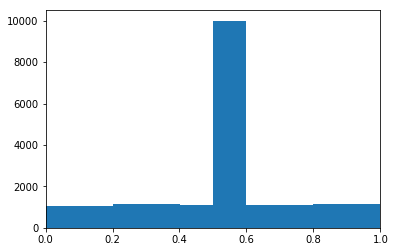

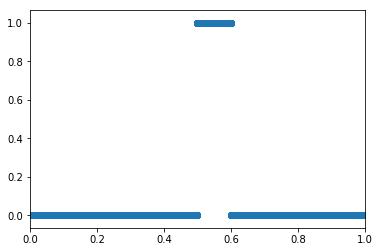

In [ ]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 1s 37us/sample - loss: 0.2507 - val_loss: 0.2505
Epoch 2/100
18000/18000 [==============================] - 1s 29us/sample - loss: 0.2499 - val_loss: 0.2494
Epoch 3/100
18000/18000 [==============================] - 1s 29us/sample - loss: 0.2486 - val_loss: 0.2482
Epoch 4/100
18000/18000 [==============================] - 1s 29us/sample - loss: 0.2444 - val_loss: 0.2405
Epoch 5/100
18000/18000 [==============================] - 1s 30us/sample - loss: 0.2364 - val_loss: 0.2323
Epoch 6/100
18000/18000 [==============================] - 1s 29us/sample - loss: 0.2291 - val_loss: 0.2254
Epoch 7/100
18000/18000 [==============================] - 1s 29us/sample - loss: 0.2204 - val_loss: 0.2153
Epoch 8/100
18000/18000 [==============================] - 1s 29us/sample - loss: 0.2100 - val_loss: 0.2043
Epoch 9/100
18000/18000 [==============================] - 1s 29us/sample - loss: 0.198

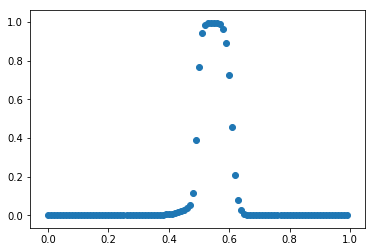

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_)

- 특정 패턴인 경우 1, 다른 경우인 경우 0으로 분류한다.
- 출력된 값이 0.5보다 크면 1로, 0.5보다 작으면 0으로 간주한다.
####<br>

## 1-4. 클래스 2개, 출력 노드 2개인 경우
- 분류 카테고리의 개수만큼 출력노드를 가진다.
- one-hot-encoding된 값을 출력하면 변별력이 커진다.

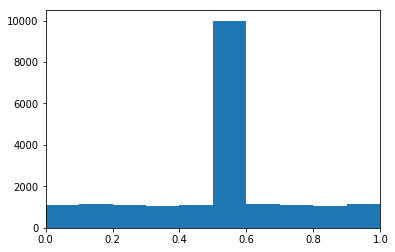

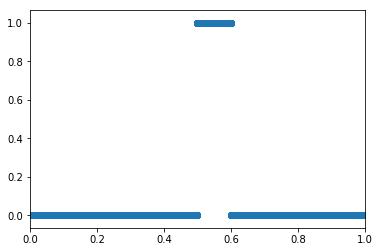

In [ ]:
all_low = 0
all_high = 1
square_low = 0.5
square_high = 0.6
zero_count = 10000
one_count = 10000

train_x, train_y = build_square_data(all_low, all_high, square_low, square_high, zero_count, one_count)

In [ ]:
# ADD START
reshaped_y = train_y.reshape((train_y.shape[0],1))
train_y = np.append(reshaped_y, reshaped_y, axis=1)
train_y[:,1] = 1-train_y[:,0]
# ADD END

Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 1s 50us/sample - loss: 0.2551 - val_loss: 0.2466
Epoch 2/100
18000/18000 [==============================] - 1s 35us/sample - loss: 0.2430 - val_loss: 0.2389
Epoch 3/100
18000/18000 [==============================] - 1s 34us/sample - loss: 0.2261 - val_loss: 0.2118
Epoch 4/100
18000/18000 [==============================] - 1s 36us/sample - loss: 0.1948 - val_loss: 0.1705
Epoch 5/100
18000/18000 [==============================] - 1s 35us/sample - loss: 0.1432 - val_loss: 0.1106
Epoch 6/100
18000/18000 [==============================] - 1s 36us/sample - loss: 0.0931 - val_loss: 0.0761
Epoch 7/100
18000/18000 [==============================] - 1s 36us/sample - loss: 0.0739 - val_loss: 0.0671
Epoch 8/100
18000/18000 [==============================] - 1s 36us/sample - loss: 0.0631 - val_loss: 0.0553
Epoch 9/100
18000/18000 [==============================] - 1s 35us/sample - loss: 0.055

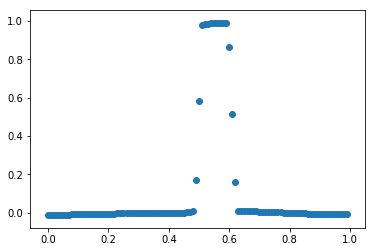

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=32, validation_split=0.1)

x_ = np.arange(all_low, all_high, 0.01)
y_ = model.predict(x_)
plt.scatter(x_, y_[:,0])

- 출력 노드의 값은 0과 1이 서로 상반된다.
- 하지만 이렇게 카테고리 개수 만큼 출력 노드가 있는 경우, 카테고리를 2개 이상으로 해도 처리가 가능해 진다.
####<br>

## 1-5. 클래스 4개, 출력 노드 4개인 경우

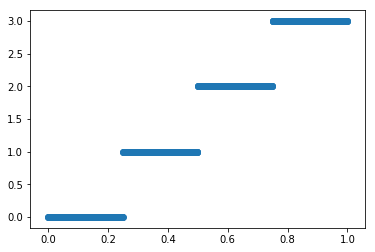

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [ ]:
train_x = np.arange(0, 1, 0.001)

class_index = np.zeros_like(train_x, dtype=np.int)
class_index[:250] = 0
class_index[250:500] = 1
class_index[500:750] = 2
class_index[750:] = 3


plt.scatter(train_x, class_index)
plt.show()

train_y = np.zeros((1000, 4))
train_y[np.arange(1000), class_index] = 1 # one-hot 인코딩

print(train_y[245:255])

Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 1s 992us/sample - loss: 0.1732 - val_loss: 0.2329
Epoch 2/100
900/900 [==============================] - 1s 891us/sample - loss: 0.1384 - val_loss: 0.1961
Epoch 3/100
900/900 [==============================] - 1s 884us/sample - loss: 0.1252 - val_loss: 0.1584
Epoch 4/100
900/900 [==============================] - 1s 907us/sample - loss: 0.1196 - val_loss: 0.1817
Epoch 5/100
900/900 [==============================] - 1s 907us/sample - loss: 0.1145 - val_loss: 0.1166
Epoch 6/100
900/900 [==============================] - 1s 990us/sample - loss: 0.1073 - val_loss: 0.1098
Epoch 7/100
900/900 [==============================] - 1s 916us/sample - loss: 0.0998 - val_loss: 0.0910
Epoch 8/100
900/900 [==============================] - 1s 931us/sample - loss: 0.0920 - val_loss: 0.0732
Epoch 9/100
900/900 [==============================] - 1s 870us/sample - loss: 0.0831 - val_loss: 0.0550
Epoch 10/

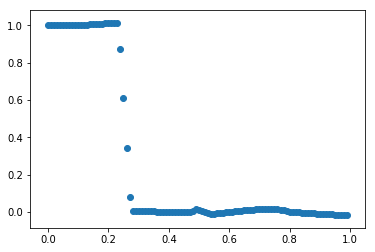

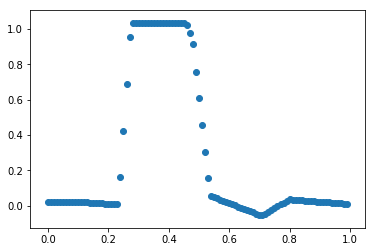

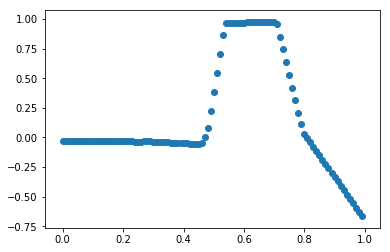

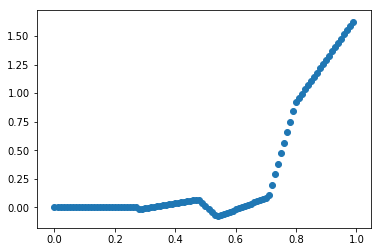

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(1,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4))

model.compile(optimizer="SGD", loss="mse")
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=1, validation_split=0.1)

x_ = np.arange(0, 1, 0.01)
y_ = model.predict(x_)
for i in range(4):
  plt.scatter(x_, y_[:,i])
  plt.show()


####<br>

# **2. DNN 기반 IRIS 데이터 분류**

## 2-1. 모듈 임포팅

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## 2-2. 데이터 준비

In [ ]:
iris_filepath = '{}{}'.format(ROOT_PATH, "iris.csv")

iris = pd.read_csv(iris_filepath)
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   setosa         120 non-null    int64  
 5   versicolor     120 non-null    int64  
 6   virginica      120 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 6.7 KB


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 7)
[[6.4 2.8 5.6 2.2 0.  0.  1. ]
 [5.  2.3 3.3 1.  0.  1.  0. ]
 [4.9 2.5 4.5 1.7 0.  0.  1. ]
 [4.9 3.1 1.5 0.1 1.  0.  0. ]
 [5.7 3.8 1.7 0.3 1.  0.  0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

## 2-3. 모델 작성

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs=200, verbose=0)

In [ ]:
loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)


20/20 [==============================] - 0s 1ms/sample - loss: 0.0612 - acc: 1.0000
loss : 0.06120643764734268
acc : 1.0


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.9706930e-01 2.9302919e-03 4.3446335e-07]
 [3.2833036e-02 9.4043523e-01 2.6731769e-02]
 [9.9474621e-01 5.2515958e-03 2.2809691e-06]
 [1.4951557e-02 9.6313220e-01 2.1916179e-02]
 [9.9065429e-01 9.3442202e-03 1.4947350e-06]
 [9.9813652e-01 1.8633120e-03 1.3325450e-07]
 [9.9774134e-01 2.2585820e-03 1.2865887e-07]
 [9.9686497e-01 3.1347724e-03 2.6978194e-07]
 [1.8069820e-02 9.6339989e-01 1.8530309e-02]
 [9.9351329e-01 6.4854953e-03 1.3548229e-06]
 [8.8122603e-04 3.7372527e-01 6.2539351e-01]
 [8.4496764e-03 9.1537786e-01 7.6172389e-02]
 [9.9595189e-01 4.0474022e-03 6.5902634e-07]
 [1.5941281e-06 4.8109479e-03 9.9518740e-01]
 [9.8040819e-01 1.9587902e-02 3.8771045e-06]
 [5.0695003e-03 7.2197747e-01 2.7295303e-01]
 [8.2464004e-03 9.2450929e-01 6.7244329e-02]
 [9.9189514e-01 8.1019765e-03 2.8098636e-06]
 [9.9735487e-01 2.6448120e-03 4.1016887e-07]
 [3.4020383e-02 9.4648600e-01 1.9493669e-02]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


## 2-4. Categorical Crossentropy

### categorical_crossentropy 손실함수
- crossentropy 함수의 종류
  - categorical_crossentropy
  - sparse_categorical_crossentropy

####<br>
#### (1) categorical_crossentropy
- y의 값이 one hot encoding인 경우
```
1,0,0
0,1,0
0,0,1
```

- 출력 레이어 설정
```
model.add(Dense(3, activation="softmax")) # 출력 레이어
```

- loss 설정
```
model.compile(..., loss='categorical_crossentropy')
```

####<br>
#### (2) sparse_categorical_crossentropy
- y의 값이 one hot encoding인 경우
```
0
1
2
```

- 출력 레이어 설정
```
model.add(Dense(3, activation="softmax")) # 출력 레이어. 1이 아니라 클래스 수 3
```

- loss 설정
```
model.compile(..., loss='sparse_categorical_crossentropy')
```


## 2-5. iris_dnn with category index
- 아래의 코드는 iris_dnn_and_optimizer.ipynb의 코드를 기반으로 한다.


In [ ]:
iris_cat_filepath = '{}{}'.format(ROOT_PATH, "iris_with_category_index.csv")

iris = pd.read_csv(iris_cat_filepath)
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax")) # 1이 아니고 클래스 수 3이다

# model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
20/20 [==============================] - 0s 1ms/sample - loss: 0.0229 - acc: 1.0000
loss= 0.022887900471687317
acc= 1.0


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.9847358e-01 1.5264613e-03 1.2309558e-18]
 [7.6899896e-03 9.9223328e-01 7.6782053e-05]
 [9.8814082e-01 1.1859228e-02 3.4370640e-15]
 [1.6402206e-03 9.9827373e-01 8.6055989e-05]
 [9.9785244e-01 2.1475977e-03 3.0429613e-18]
 [9.9957103e-01 4.2895161e-04 8.7289074e-21]
 [9.9973327e-01 2.6671527e-04 1.4658062e-21]
 [9.9970859e-01 2.9136118e-04 6.2663188e-21]
 [5.1919767e-03 9.9479300e-01 1.5110068e-05]
 [9.9737012e-01 2.6298296e-03 1.1271147e-17]
 [2.6161895e-05 2.0415072e-01 7.9582316e-01]
 [9.0278673e-04 9.9801528e-01 1.0819935e-03]
 [9.9703276e-01 2.9672212e-03 7.2630362e-18]
 [7.2711309e-06 9.3889140e-02 9.0610355e-01]
 [9.9664199e-01 3.3580558e-03 1.3639418e-17]
 [5.3521415e-04 9.2279166e-01 7.6673135e-02]
 [1.1347209e-03 9.9852920e-01 3.3598760e-04]
 [9.9723262e-01 2.7673352e-03 5.8874805e-17]
 [9.9887568e-01 1.1243655e-03 7.4928465e-19]
 [2.6791799e-03 9.9724102e-01 7.9823789e-05]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


####<br>

# **3. DNN 기반 MNIST 데이터 분류**

## 3-1. 모듈 임포팅

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten

import time

## 3-2. 데이터 준비

### 3-2-1. 데이터 다운로드 및 설정

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(raw_train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

5


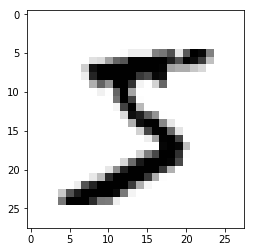

0


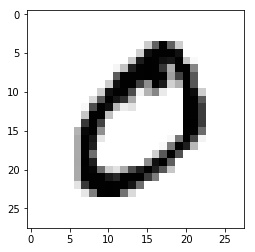

4


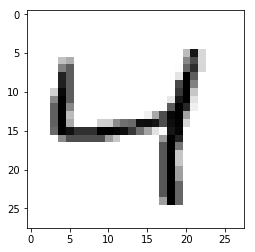

1


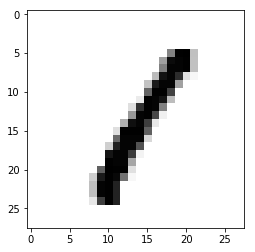

In [ ]:
for i in range(4):
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()

### 3-2-2. 데이터 정규화(Normalization)

In [ ]:
print(np.max(raw_train_x[:,]))
print(np.max(raw_test_x[:,]))

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))
print(np.max(test_x[:,]))


255
255
1.0
1.0


In [ ]:
print(train_x.shape)

(60000, 28, 28)


In [ ]:
data_count = train_x.shape[0]
data_size = train_x.shape[1]*train_x.shape[2]
train_x = train_x.reshape((data_count, data_size))

data_count = test_x.shape[0]
test_x = test_x.reshape((data_count, data_size))

print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


## 3-3. 모델 작성

In [ ]:
model = keras.Sequential()
# model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
# model.add(Dense(3, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# start_time = time.time() # REMOVED
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
# print("elapsed : {}".format(time.time() - start_time)) # REMOVED

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2464 - acc: 0.9289
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2363 - acc: 0.9316
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2297 - acc: 0.9344
Epoch 4/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2226 - acc: 0.9360
Epoch 5/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2158 - acc: 0.9379


In [ ]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.2589 - acc: 0.9236
loss= 0.25886706688553096
acc= 0.9236


[[4.5903499e-07 9.8230987e-07 1.2600233e-04 ... 9.9884260e-01
  1.1186424e-07 3.2265886e-04]
 [1.6758602e-05 3.8688796e-07 9.9646842e-01 ... 8.2542861e-09
  2.8139252e-06 4.7780413e-10]
 [5.9287263e-06 9.6491021e-01 2.4216540e-02 ... 4.4716327e-03
  3.8485185e-03 4.3035088e-05]
 ...
 [7.4655206e-09 1.9598296e-07 4.7546102e-05 ... 3.1681039e-04
  3.3057874e-04 3.0883655e-03]
 [4.9102542e-05 3.1203899e-06 1.0115113e-04 ... 8.9510127e-07
  2.8966980e-03 1.8058785e-05]
 [1.2401956e-06 1.1998927e-15 8.8047511e-07 ... 5.1103907e-14
  1.4971915e-08 8.7089841e-10]]
[7 2 1 ... 4 5 6]
7


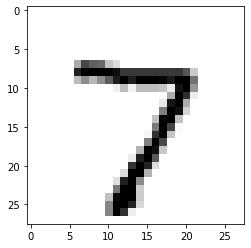

2


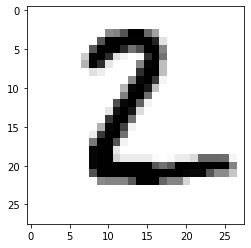

1


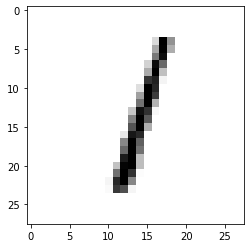

0


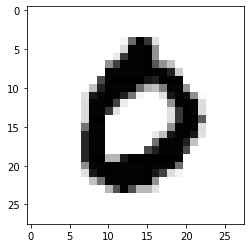

In [ ]:
y_ = model.predict(test_x)
print(y_)
predicted = np.argmax(y_, axis=1)
print(predicted)

for i in range(4):
  print(predicted[i])
  plt.imshow(raw_test_x[i], cmap=plt.cm.binary)
  plt.show()

## 3-4. 전체코드

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

train_x = train_x.reshape((60000, 28*28))
test_x = test_x.reshape((10000, 28*28))


In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.9044 - acc: 0.7136
Epoch 2/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3927 - acc: 0.8880
Epoch 3/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3307 - acc: 0.9058
Epoch 4/5
60000/60000 [==============================] - 1s 21us/sample - loss:

## 3-5. Flatten 레이어 사용하기
- (None, 28, 28) shape의 train_x를 그대로 사용.
- 모델의 처음에 Flatten() 레이어를 두어, 입력 모양을 변경한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

# data_count = train_x.shape[0] # COMMENT OUT
# data_size = train_x.shape[1]*train_x.shape[2] # COMMENT OUT
# train_x = train_x.reshape((data_count, data_size)) # COMMENT OUT

# data_count = test_x.shape[0] # COMMENT OUT
# test_x = test_x.reshape((data_count, data_size)) # COMMENT OUT

In [ ]:

model = keras.Sequential()
model.add(Input((28,28)))  # ADD
model.add(Flatten())       # ADD
# model.add(Dense(10, activation='relu', input_shape=(28*28,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8637 - acc: 0.7340
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4008 - acc: 0.8817
Epoch 3/5
60000/60000 [==

## 3-6 DNN classification Template

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255
test_x = test_x/255


model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 22us/sample - loss: 1.0497 - acc: 0.6647
Epoch 2/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4016 - acc: 0.8855
Epoch 3/5
60000/60000 [========================

## 3-7. 정규화(Normalization)

### 3-7-1. 정규화를 하지 않으면
- 위에서는 0 ~ 255의 값을 0 ~ 1로 normalization하여 학습했다.
- 이 과정을 생략하고 그대로 실행한다.

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 18us/sample - loss: 2.4654 - acc: 0.1538
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 1.9504 - acc: 0.2509
Epoch 3/5
60000/60000 [=========================

- 학습이 진행되지만 normalization했을 때와 비교하면 더디게 진행된다.
- 아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```

### 3-7-2. -1 ~ 1로 정규화

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/127.5 - 1
test_x = test_x/127.5 - 1


In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 1.3357 - acc: 0.5336
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.7027 - acc: 0.7702
Epoch 3/5
60000/60000 [=========================

- 학습이 진행되지만 normalization했을 때와 비교하면 더디게 진행된다.
- 아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```

### 3-7-3. -255 ~ 255로 정규화

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x*2 - 255
test_x = test_x*2 - 255

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 18us/sample - loss: 4.1636 - acc: 0.1091
Epoch 2/5
60000/60000 [==============================] - 1s 17us/sample - loss: 2.3027 - acc: 0.1123
Epoch 3/5
60000/60000 [=========================

학습이 진행되지만 normalization 안했을 때 보다 더디게 진행된다.

아래는 normalization을 안했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 18us/sample - loss: 2.4654 - acc: 0.1538
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 1.9504 - acc: 0.2509
Epoch 3/5
60000/60000 [==============================] - 1s 17us/sample - loss: 1.7553 - acc: 0.3037
Epoch 4/5
60000/60000 [==============================] - 1s 18us/sample - loss: 1.6404 - acc: 0.3354
Epoch 5/5
60000/60000 [==============================] - 1s 18us/sample - loss: 1.5597 - acc: 0.3471
10000/10000 [==============================] - 0s 26us/sample - loss: 1.5352 - acc: 0.3417
loss= 1.5351685056686402
acc= 0.3417
```

### 3-7-4. 0 ~ 0.5로 정규화

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/255/2
test_x = test_x/255/2

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 1.0266 - acc: 0.6823
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4344 - acc: 0.8783
Epoch 3/5
60000/60000 [=========================

- 학습이 되며 0~1로 normalization했을 때 보다 살짝 더디다
- 아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```

### 3-7-5. 0 ~ 2로 정규화

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

# train_x = train_x/255
# test_x = test_x/255
train_x = train_x/255*2
test_x = test_x/255*2

In [ ]:
model = keras.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.7630 - acc: 0.7654
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3363 - acc: 0.9045
Epoch 3/5
60000/60000 [=========================

- 학습이 되며 0~1로 normalization했을 때 보다 살짝 빠르다
- 아래는 0~1로 normalization을 했을 때
```
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.8862 - acc: 0.7278
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3659 - acc: 0.8950
Epoch 3/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3164 - acc: 0.9100
Epoch 4/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2904 - acc: 0.9171
Epoch 5/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2724 - acc: 0.9225
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2613 - acc: 0.9265
loss= 0.26132496373653413
acc= 0.9265
```